<a href="https://colab.research.google.com/github/ariso-sac/Sep-2022-NoteBooks/blob/colab-week-2/Working_Perceptron_messed_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,10,50)
x.shape

(50,)

In [3]:
y=[]
label=[]
for i in x:
  t=np.random.random()
  if t>0.5:
    l=1
    temp=(i)+2*t*20-15
  else:
    l=-1
    temp=(i)+t*20*(-2)-5
  y.append(temp)
  label.append(l)
y=np.array(y)
label=np.array(label)

In [4]:
df=pd.DataFrame()
df['x']=x
df['y']=y
df['label']=label

In [5]:
df.tail()

,x,y,label
45,9.183673,-4.540980,-1
46,9.387755,-3.491317,-1
47,9.591837,-5.206366,-1
48,9.795918,19.944135,1
49,10.000000,-5.299082,-1


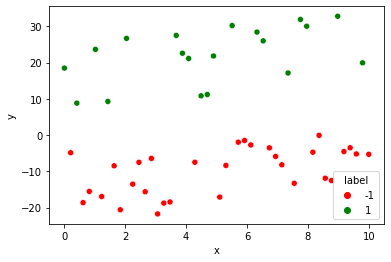

In [6]:
sns.scatterplot(data=df,x='x',y='y',hue='label',palette=['red','green'])

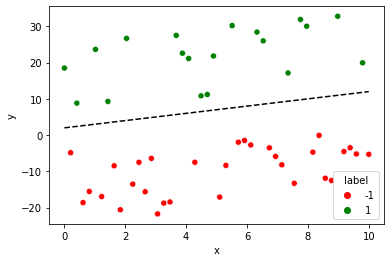

In [7]:
sns.scatterplot(data=df,x='x',y='y',hue='label',palette=['red','green'])
plt.plot(x,x+2,'--',c='black')

In [8]:
X=df[['x','y']]
Y=df['label']

In [9]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(X,Y)
print(clf.coef_)
print(clf.intercept_)

[[-2.85714286 30.2945677 ]]
[0.]


Text(0.5, 1.0, 'y = 0.09431205241531 * x - 0.0')

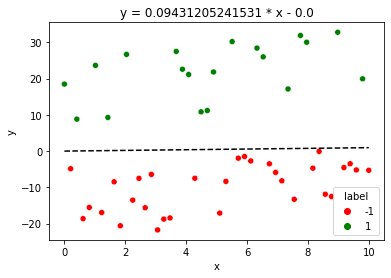

In [10]:
wieghts = clf.coef_[0]
slope = -wieghts[0] / wieghts[1]
yy = slope * x - (clf.intercept_[0]) / wieghts[1]

sns.scatterplot(data=df,x='x',y='y',hue='label',palette=['red','green'])
plt.plot(x,yy,'--',c='black')
plt.title('y = '+str(slope)+' * x - '+str((clf.intercept_[0]) / wieghts[1]))

In [11]:
clf.score(X,Y)

1.0

In [12]:
clf.n_iter_

7

In [13]:
from sklearn.preprocessing import add_dummy_feature
f=add_dummy_feature(X)
X=pd.DataFrame(data=f,columns=['dummy','x','y'])

In [14]:
w=[0,0,0]
# w=[0,0]
error=0
iters=0

In [15]:
def sign(v):
  if v>-1:
    return 1
  else:
    return -1

In [16]:
df['dummy']=X['dummy']
while iters < 10:
  error=0
  iters+=1
  for _ ,row in df.iterrows():
      xx=row[['dummy','x','y']].to_numpy()
      # xx=row[['x','y']].to_numpy()
      yy=row[['label']].to_numpy()
      # print(type(xx))
      # print(xx)
      # print(yy)
      # break
      p=np.dot(w,xx)
      y_hat=sign(p)
      # print(y_hat*yy[0])
      if y_hat*yy[0]==-1:
        error+=1
        # print(xx*yy)
        w=w+xx*yy
        print(w)
  if error==0:
    break

[-1.         -0.20408163  4.87109752]


In [17]:
w

array([-1.        , -0.20408163,  4.87109752])

In [18]:
iters

2

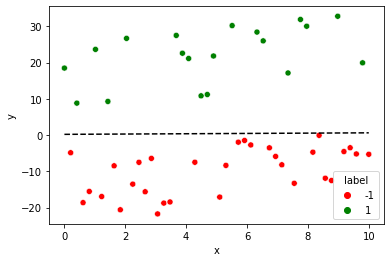

In [19]:
slope = -w[1] / w[2]
yy = slope * x - (w[0]) / w[2]

sns.scatterplot(data=df,x='x',y='y',hue='label',palette=['red','green'])
plt.plot(x,yy,'--',c='black')

In [20]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

In [21]:
df=pd.DataFrame()
df['X1']=X[:,0]
df['X2']=X[:,1]
y[y<1]=-1
df['label']=y
df

,X1,X2,label
0,4.358095,-4.198720,1
1,2.700070,-2.608306,1
2,2.926131,-2.178315,1
3,2.704925,-2.558665,1
4,1.404034,-3.913618,1
5,3.036883,-2.490148,1
6,2.742561,-2.927515,1
7,-2.531473,-3.045715,-1
8,-1.906524,-3.033651,-1
9,3.552249,-4.025507,1


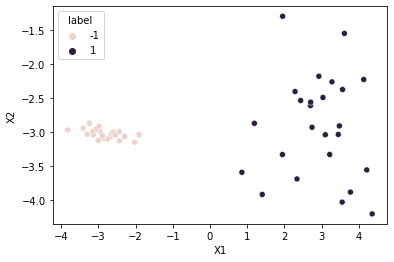

In [22]:
sns.scatterplot(data=df,x='X1',y='X2',hue='label')

In [23]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(X,y)
print(clf.coef_)
print(clf.intercept_)

[[5.57394558 0.50362595]]
[0.]


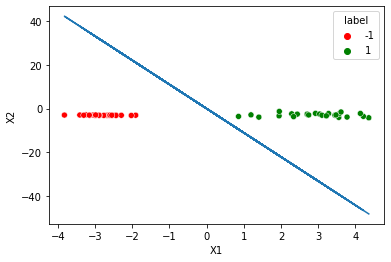

In [24]:
wieghts = clf.coef_[0]
slope = -wieghts[0] / wieghts[1]
yy = slope * df['X1'].to_numpy() - (clf.intercept_[0]) / wieghts[1]

sns.scatterplot(data=df,x='X1',y='X2',hue='label',palette=['red','green'])
plt.plot(df['X1'].to_numpy(),yy)

In [25]:
from sklearn.preprocessing import add_dummy_feature
f=add_dummy_feature(X)
X=pd.DataFrame(data=f,columns=['dummy','x','y'])

In [26]:
w=[0,0,0]
error=0
iters=0

In [27]:
df['dummy']=X['dummy']
while iters < 10:
  error=0
  iters+=1
  for _ ,row in df.iterrows():
      xx=row[['dummy','X1','X2']].to_numpy()
      # xx=row[['x','y']].to_numpy()
      yy=row[['label']].to_numpy()
      # print(type(xx))
      # print(xx)
      # print(yy)
      # break
      p=np.dot(w,xx)
      y_hat=sign(p)
      # print(y_hat*yy[0])
      if y_hat*yy[0]==-1:
        error+=1
        # print(xx*yy)
        w=w+xx*yy
        print(w)
  if error==0:
    break

[-1.          2.53147281  3.04571493]
[ 0.          6.08372134 -0.97979197]


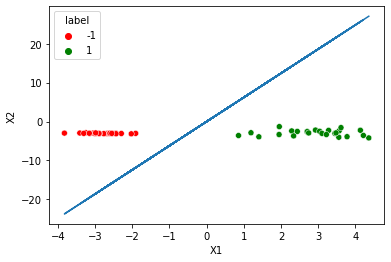

In [28]:
slope = -w[1] / w[2]
yy = slope * df['X1'].to_numpy() - (w[0]) / w[2]

sns.scatterplot(data=df,x='X1',y='X2',hue='label',palette=['red','green'])
plt.plot(df['X1'].to_numpy(),yy)